In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
%matplotlib inline

In [7]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################

# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app 
exported_and_trandformed_csv_file = "data/weight.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)

weight_idx = "Weight (lb)"
# make dataColumn a datetime.
date_idx="Start"
df[date_idx] = pd.to_datetime(df[date_idx])

# Create Time Period Groups
month_year_idx="month_year" 
df[month_year_idx]=df[date_idx].apply(lambda t:f"{t.month}-{t.year-2000}")

week_year_idx="week_year" 
df[week_year_idx]=df[date_idx].apply(lambda t:f"{t.week}-{t.year-2000}")

# Helpful time aliases
df_alltime = df

In [8]:
arrow.utcnow().shift(months=-6).date()

datetime.date(2017, 8, 5)

In [4]:
# Historical Weight

In [9]:
def plot_weight_over_time(df, x):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width. 
    height_in_inches=8
    mpl.rc("figure", figsize=(2*height_in_inches,height_in_inches))
 
    ax = sns.boxplot(x=x, y=weight_idx, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.set_title("Weight")
    ax.set_xlabel("date")
    ax.set_ylabel("lbs")

# Recent Weight

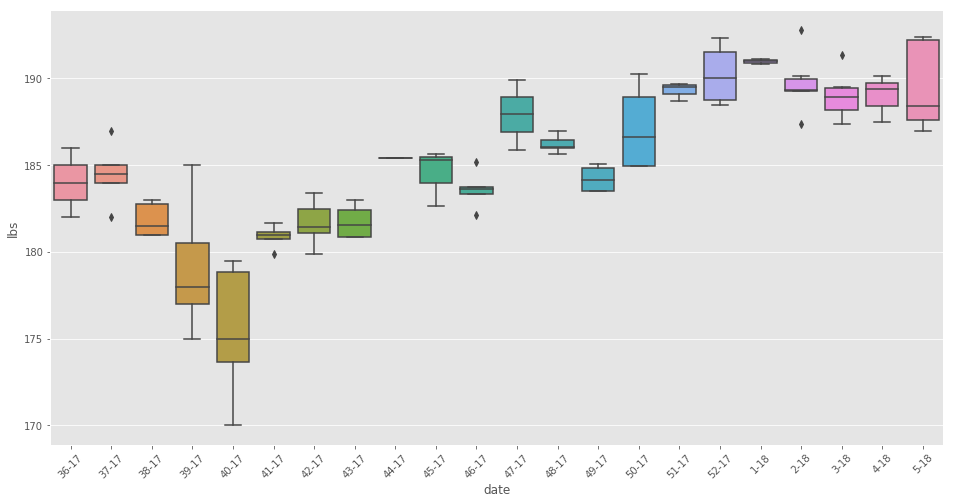

In [14]:
earliest = arrow.utcnow().shift(months=-5).date()
df_recent = df[df[date_idx] > earliest ]
plot_weight_over_time(df_recent,week_year_idx)

# Historical Weight

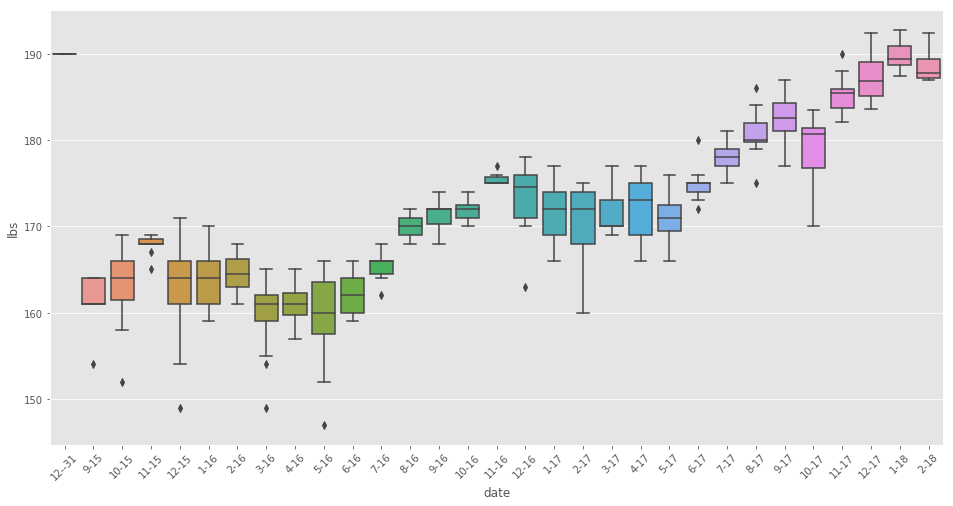

In [15]:
plot_weight_over_time(df_alltime,month_year_idx)